<a href="https://colab.research.google.com/github/EonLion/git_trail_version/blob/main/Rides_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
rideit_drivers = pd.read_csv('/content/rideit_drivers.csv')

In [7]:
rideit_drivers_activity=pd.read_csv('/content/rideit_drivers_activity.csv')

In [8]:
rideit_drivers.head()

,id_driver,date_registration,driver_rating,gold_level_count,receive_marketing,country_code,service_type
0,15260831,2015-11-18,4.85,2.0,True,ES,TAXI
1,58194598,2020-03-12,4.79,26.0,True,DE,PHV
2,21139412,2017-05-15,4.76,10.0,True,DE,TAXI
3,48382094,2019-03-20,4.91,3.0,False,DE,TAXI
4,52914047,2019-08-02,4.96,10.0,True,DE,PHV


In [9]:
rideit_drivers_activity.columns

Index(['id_driver', 'active_date', 'offers', 'bookings',
       'bookings_cancelled_by_passenger', 'bookings_cancelled_by_driver',
       'rides'],
      dtype='object')

In [10]:
rideit_joined = pd.merge(rideit_drivers, rideit_drivers_activity, how='inner')

In [11]:
rideit_joined.head(5)

,id_driver,date_registration,driver_rating,gold_level_count,receive_marketing,country_code,service_type,active_date,offers,bookings,bookings_cancelled_by_passenger,bookings_cancelled_by_driver,rides
0,443472,2011-11-16,4.76,0.0,True,DE,TAXI,2020-01-01,8.0,1.0,0.0,0.0,1.0
1,443472,2011-11-16,4.76,0.0,True,DE,TAXI,2020-01-03,6.0,1.0,0.0,0.0,1.0
2,443472,2011-11-16,4.76,0.0,True,DE,TAXI,2020-01-04,5.0,1.0,0.0,1.0,0.0
3,443472,2011-11-16,4.76,0.0,True,DE,TAXI,2020-01-05,3.0,2.0,0.0,0.0,2.0
4,443472,2011-11-16,4.76,0.0,True,DE,TAXI,2020-01-07,4.0,3.0,0.0,0.0,3.0


In [12]:
rideit_joined.columns

Index(['id_driver', 'date_registration', 'driver_rating', 'gold_level_count',
       'receive_marketing', 'country_code', 'service_type', 'active_date',
       'offers', 'bookings', 'bookings_cancelled_by_passenger',
       'bookings_cancelled_by_driver', 'rides'],
      dtype='object')

In [13]:
rideit_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78673 entries, 0 to 78672
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_driver                        78673 non-null  int64  
 1   date_registration                78673 non-null  object 
 2   driver_rating                    78673 non-null  float64
 3   gold_level_count                 78673 non-null  float64
 4   receive_marketing                78673 non-null  bool   
 5   country_code                     78673 non-null  object 
 6   service_type                     78673 non-null  object 
 7   active_date                      78673 non-null  object 
 8   offers                           78673 non-null  float64
 9   bookings                         78673 non-null  float64
 10  bookings_cancelled_by_passenger  78673 non-null  float64
 11  bookings_cancelled_by_driver     78673 non-null  float64
 12  rides             

**Highest No of Rides cancelled**

In [14]:
rideit_drivers_activity[['id_driver','bookings_cancelled_by_driver']].groupby('id_driver').sum().sort_values(by='bookings_cancelled_by_driver', ascending=False).head(1)

,bookings_cancelled_by_driver
id_driver,
722,93.0


**On which Date did most of the rides got cancelled**

In [15]:
rideit_drivers_activity[['active_date','bookings_cancelled_by_driver']].groupby('active_date').sum().sort_values(by='bookings_cancelled_by_driver', ascending=False).head(1)

,bookings_cancelled_by_driver
active_date,
2020-01-01,673.0


**Most rides happened on which date**

In [16]:
import pandas as pd

# Assuming rideit_joined is your DataFrame
# First, ensure that the 'active_date' column is in datetime format
rideit_joined['active_date'] = pd.to_datetime(rideit_joined['active_date'])

# Group by the 'active_date' and sum the number of rides
rides_per_day = rideit_joined.groupby(rideit_joined['active_date'].dt.date)['rides'].sum()

# Find the date with the maximum number of rides
most_rides_date = rides_per_day.idxmax()
most_rides_count = rides_per_day.max()

print(f"The date with the most rides is {most_rides_date} with {most_rides_count} rides.")


The date with the most rides is 2020-02-13 with 2700.0 rides.


**Surge in Bookings over time**

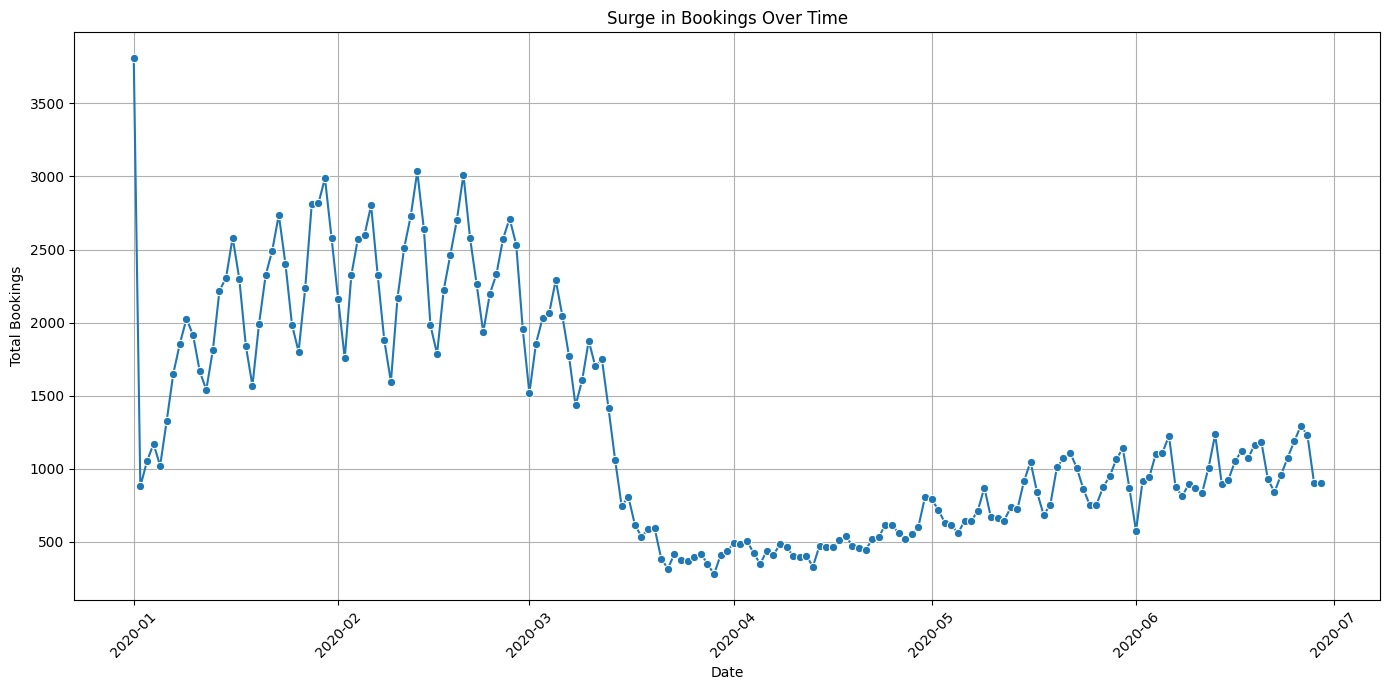

In [23]:
rideit_joined['active_date'] = pd.to_datetime(rideit_joined['active_date'])
bookings_per_day = rideit_joined.groupby(rideit_joined['active_date'].dt.date)['bookings'].sum().reset_index()
bookings_per_day.columns = ['date', 'total_bookings']
plt.figure(figsize=(14, 7))
sns.lineplot(data=bookings_per_day, x='date', y='total_bookings', marker='o')
plt.title('Surge in Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

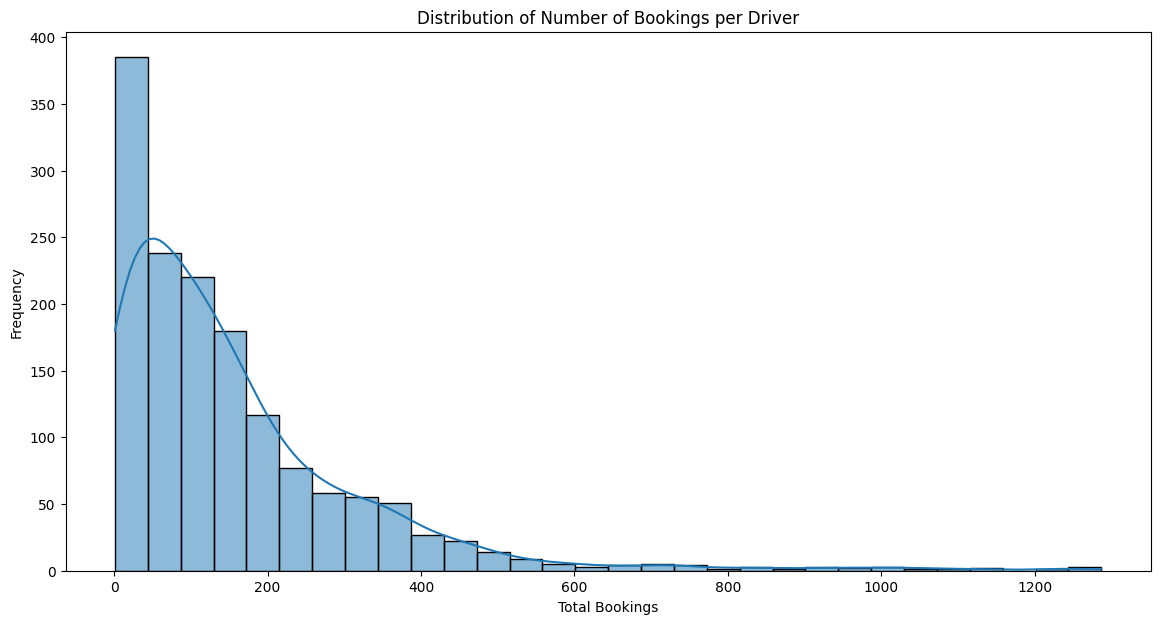

In [25]:
bookings_per_driver = rideit_joined.groupby('id_driver')['bookings'].sum().reset_index()
bookings_per_driver.columns = ['id_driver', 'total_bookings']
plt.figure(figsize=(14, 7))
sns.histplot(bookings_per_driver['total_bookings'], bins=30, kde=True)
plt.title('Distribution of Number of Bookings per Driver')
plt.xlabel('Total Bookings')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total Bookings')

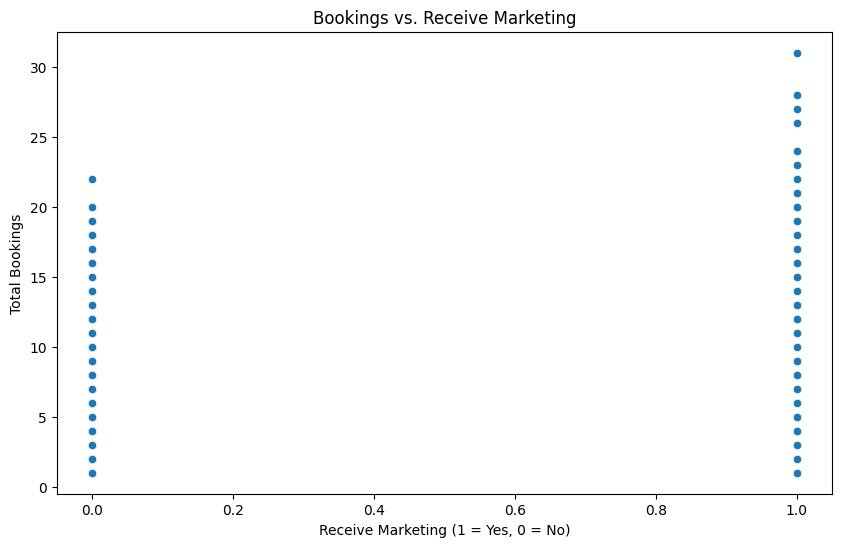

In [27]:
rideit_joined['receive_marketing_numeric'] = rideit_joined['receive_marketing'].astype(int)
correlation = rideit_joined['bookings'].corr(rideit_joined['receive_marketing_numeric'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='receive_marketing_numeric', y='bookings', data=rideit_joined)
plt.title('Bookings vs. Receive Marketing')
plt.xlabel('Receive Marketing (1 = Yes, 0 = No)')
plt.ylabel('Total Bookings')

In [39]:
rideit_joined['bookings_cancelled_by_driver'].sum()/100

105.1

In [38]:
rideit_joined['bookings_cancelled_by_passenger'].sum()/100

196.78

In [44]:
rideit_joined.columns

Index(['id_driver', 'date_registration', 'driver_rating', 'gold_level_count',
       'receive_marketing', 'country_code', 'service_type', 'active_date',
       'offers', 'bookings', 'bookings_cancelled_by_passenger',
       'bookings_cancelled_by_driver', 'rides', 'receive_marketing_numeric'],
      dtype='object')

In [48]:
rideit_joined[['id_driver','gold_level_count']].sort_values(by='gold_level_count', ascending=False)

,id_driver,gold_level_count
3272,239508,219.0
3343,239508,219.0
3337,239508,219.0
3338,239508,219.0
3339,239508,219.0
...,...,...
42874,312347,0.0
42873,312347,0.0
42872,312347,0.0
42871,168450,0.0


**Relation between gold level counts and no of bookings made**

<Axes: xlabel='gold_level_count', ylabel='bookings'>

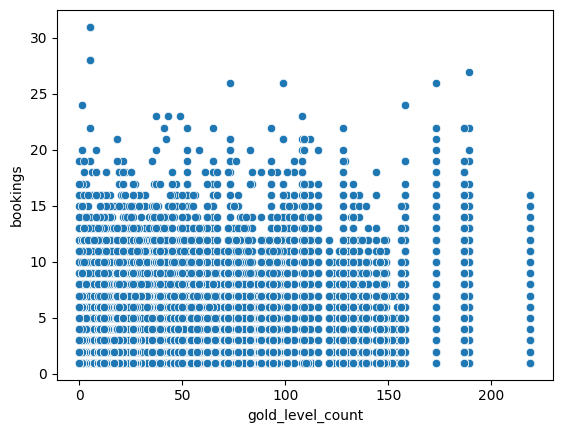

In [50]:
sns.scatterplot(x=rideit_joined['gold_level_count'], y=rideit_joined['bookings'])

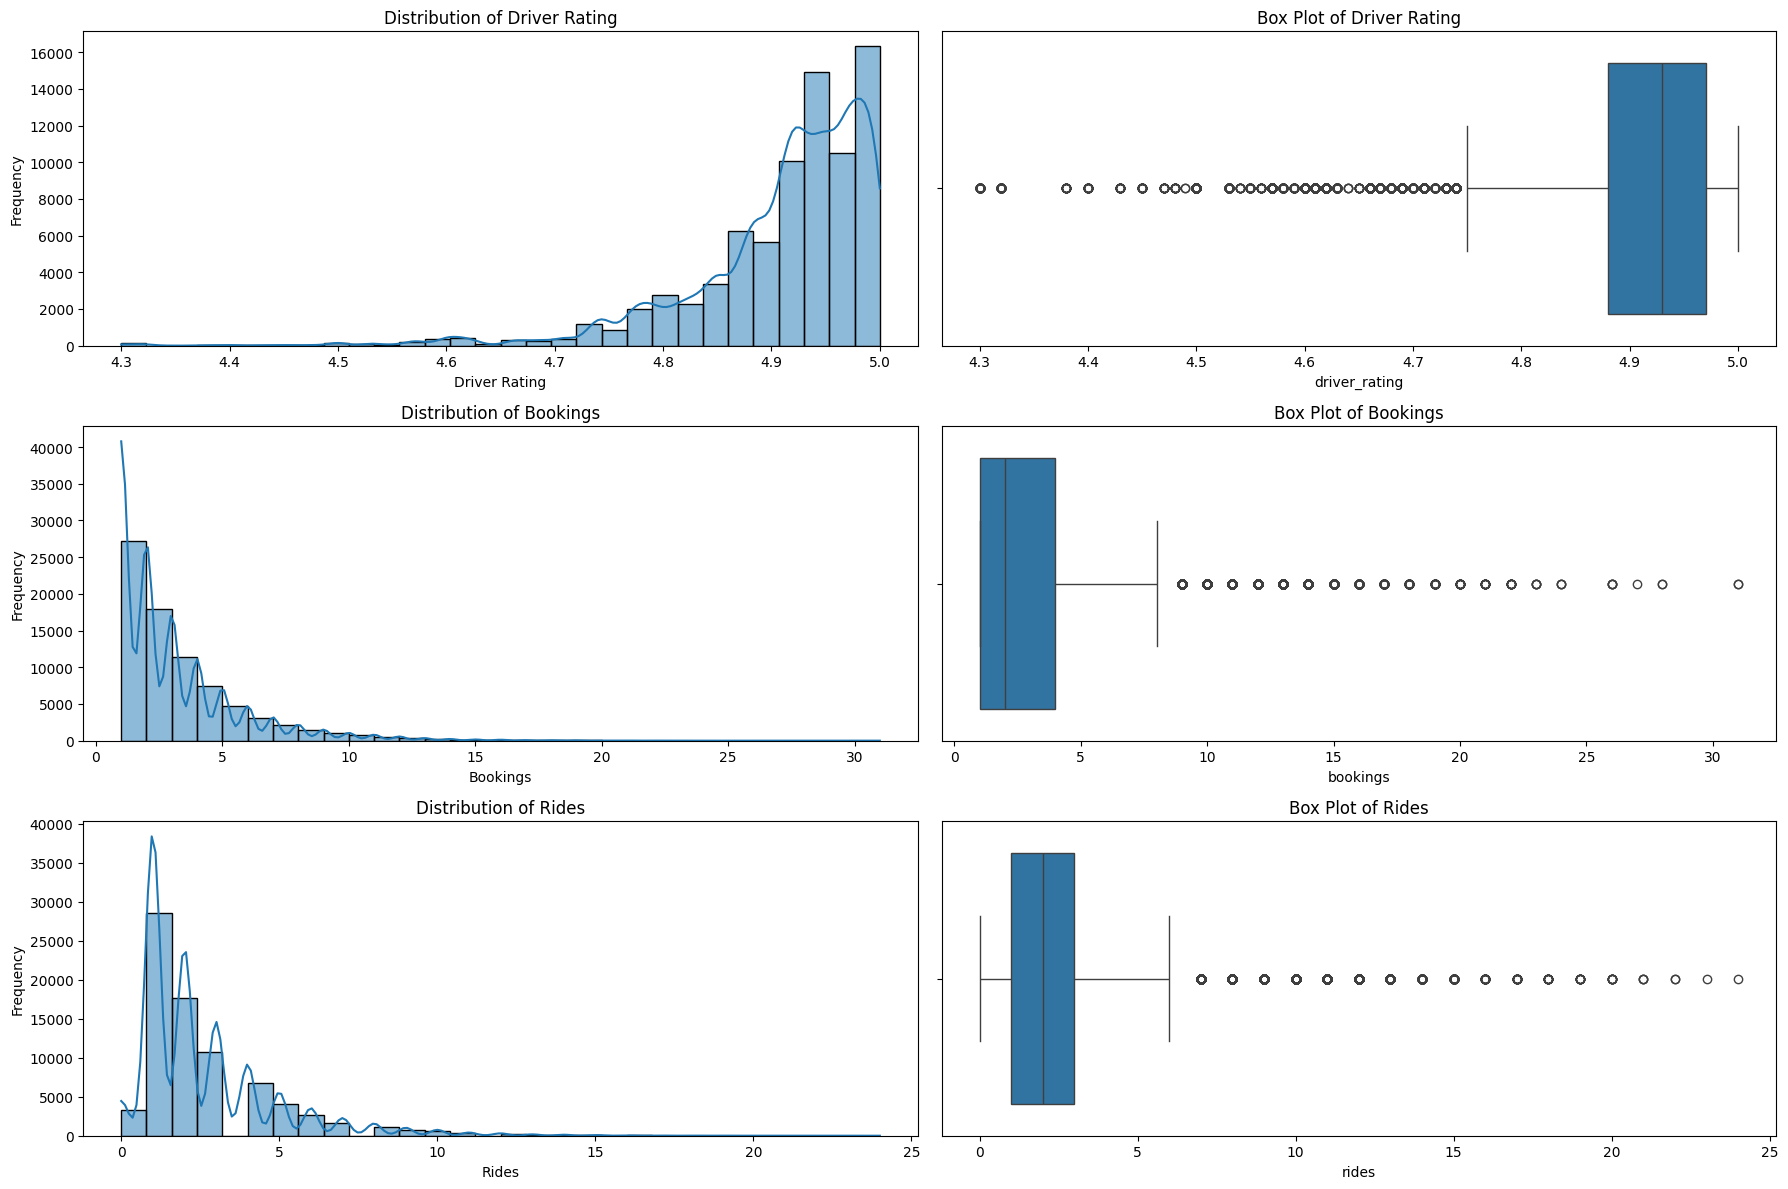

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming rideit_joined is your DataFrame

# Set up the plotting area for multiple plots
plt.figure(figsize=(18, 12))

# Plot 1: Distribution of driver_rating
plt.subplot(3, 2, 1)
sns.histplot(rideit_joined['driver_rating'], bins=30, kde=True)
plt.title('Distribution of Driver Rating')
plt.xlabel('Driver Rating')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.boxplot(x=rideit_joined['driver_rating'])
plt.title('Box Plot of Driver Rating')

# Plot 2: Distribution of bookings
plt.subplot(3, 2, 3)
sns.histplot(rideit_joined['bookings'], bins=30, kde=True)
plt.title('Distribution of Bookings')
plt.xlabel('Bookings')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
sns.boxplot(x=rideit_joined['bookings'])
plt.title('Box Plot of Bookings')

# Plot 3: Distribution of rides
plt.subplot(3, 2, 5)
sns.histplot(rideit_joined['rides'], bins=30, kde=True)
plt.title('Distribution of Rides')
plt.xlabel('Rides')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
sns.boxplot(x=rideit_joined['rides'])
plt.title('Box Plot of Rides')

# Adjust layout for clarity
plt.tight_layout()
plt.show()
